In [0]:
[from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install shap

In [0]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import lightgbm as lgb
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
# import shap

import pickle
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# FE1

In [0]:
base_train = pd.read_feather('/content/drive/My Drive/introml/fe/fe1/fe1_train.feather')

In [0]:
# encoding for installation_id and session_title
cat_features = ["installation_id"]

list_of_all_installation_id = list(set(base_train['installation_id'].unique()))
dict_of_all_installation_ids = dict(zip(list_of_all_installation_id, range(len(list_of_all_installation_id))))

base_train['installation_id'] = base_train['installation_id'].map(dict_of_all_installation_ids)

In [0]:
base_train

,index,installation_id,event_code_2000,event_code_2010,event_code_2020,event_code_2025,event_code_2030,event_code_2035,event_code_3010,event_code_3020,event_code_3021,event_code_3110,event_code_3120,event_code_3121,event_code_4020,event_code_4025,event_code_4030,event_code_4035,event_code_4040,event_code_4070,event_code_4080,event_code_4090,event_code_4100,event_code_4110,accuracy_group_x,title_Bird Measurer (Assessment),title_Cart Balancer (Assessment),title_Cauldron Filler (Assessment),title_Chest Sorter (Assessment),title_Mushroom Sorter (Assessment),type_Assessment,world_CRYSTALCAVES,world_MAGMAPEAK,world_TREETOPCITY,"('game_time', 'sum')","('game_time', 'mean')","('game_time', 'std')",accuracy_group
0,0,616,5.0,4.0,6.0,3.0,5.0,3.0,16.0,12.0,13.0,16.0,12.0,13.0,18.0,34.0,46.0,0.0,3.0,18.0,0.0,0.0,5.0,12.0,11,2,0,0,0,3,5,0,0,5,227640,45528.000000,26871.152245,3
1,1,616,5.0,4.0,6.0,3.0,5.0,3.0,16.0,12.0,13.0,16.0,12.0,13.0,18.0,34.0,46.0,0.0,3.0,18.0,0.0,0.0,5.0,12.0,11,2,0,0,0,3,5,0,0,5,227640,45528.000000,26871.152245,0
2,2,616,5.0,4.0,6.0,3.0,5.0,3.0,16.0,12.0,13.0,16.0,12.0,13.0,18.0,34.0,46.0,0.0,3.0,18.0,0.0,0.0,5.0,12.0,11,2,0,0,0,3,5,0,0,5,227640,45528.000000,26871.152245,3
3,3,616,5.0,4.0,6.0,3.0,5.0,3.0,16.0,12.0,13.0,16.0,12.0,13.0,18.0,34.0,46.0,0.0,3.0,18.0,0.0,0.0,5.0,12.0,11,2,0,0,0,3,5,0,0,5,227640,45528.000000,26871.152245,2
4,4,616,5.0,4.0,6.0,3.0,5.0,3.0,16.0,12.0,13.0,16.0,12.0,13.0,18.0,34.0,46.0,0.0,3.0,18.0,0.0,0.0,5.0,12.0,11,2,0,0,0,3,5,0,0,5,227640,45528.000000,26871.152245,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,17685,43,6.0,5.0,8.0,2.0,7.0,2.0,19.0,2.0,14.0,18.0,2.0,14.0,28.0,14.0,44.0,3.0,2.0,43.0,0.0,0.0,8.0,1.0,16,1,1,1,1,2,6,2,1,3,219523,36587.166667,14693.704957,3
17686,17686,3307,1.0,1.0,2.0,0.0,2.0,0.0,3.0,0.0,3.0,3.0,0.0,3.0,4.0,1.0,6.0,0.0,2.0,8.0,0.0,0.0,1.0,0.0,3,0,0,1,0,0,1,0,1,0,54533,54533.000000,NaN,3
17687,17687,2889,3.0,2.0,5.0,1.0,4.0,1.0,18.0,6.0,9.0,18.0,6.0,9.0,24.0,7.0,42.0,3.0,15.0,67.0,0.0,0.0,7.0,0.0,2,0,0,2,0,1,3,0,2,1,298995,99665.000000,27423.777931,1
17688,17688,2889,3.0,2.0,5.0,1.0,4.0,1.0,18.0,6.0,9.0,18.0,6.0,9.0,24.0,7.0,42.0,3.0,15.0,67.0,0.0,0.0,7.0,0.0,2,0,0,2,0,1,3,0,2,1,298995,99665.000000,27423.777931,0


In [0]:
x, y = base_train.drop('accuracy_group', axis=1), base_train.accuracy_group
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2)

In [0]:
param = {'num_leaves': 150, 
         'metric':'multi_logloss', 
         'objective': 'multiclass', 
         'n_estimators': 200,
         'num_class': 4, 
         'max_depth': 20,
         'learning_rate': .05,
         'boosting': 'gbdt',
         'random_state': 42}

train_data = lgb.Dataset(x_train, y_train, categorical_feature = cat_features)

NameError: ignored

In [0]:
def LGBModel(train_data, param):
  lgbm = lgb.train(param, train_data)
  return lgbm

def predict(lgbm, x_test, y_test):
  y_pred =lgbm.predict(x_test)

  predictions = []
  for i in y_pred:
      predictions.append(np.argmax(i))

  
  print(predictions)
  print("Classification Report: ")
  print(metrics.classification_report(y_test, predictions))
  print("Confusion Matrix: ")
  print(metrics.confusion_matrix(y_test, predictions))  
  print("QWK Score: ")
  print(cohen_kappa_score(predictions,y_test,weights='quadratic'))

In [0]:
lgbm_baseline = LGBModel(train_data, param)
predict(lgbm_baseline, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[3, 3, 3, 3, 3, 3, 2, 0, 0, 1, 3, 0, 0, 0, 1, 3, 3, 3, 2, 3, 3, 3, 1, 0, 1, 3, 3, 0, 3, 1, 3, 0, 3, 3, 3, 3, 3, 0, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 2, 3, 2, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 1, 1, 2, 0, 0, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 2, 3, 0, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 0, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 1, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 0, 2, 3, 3, 3, 1, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 

# FE2

In [0]:
fe2_train =  pd.read_feather('/content/drive/My Drive/introml/fe/fe2/fe2_train.feather')
fe2_train

,Clip,Activity,Assessment,Game,Lifting Heavy Things,Happy Camel,Bottle Filler (Activity),Flower Waterer (Activity),Honey Cake,Chicken Balancer (Activity),12 Monkeys,Treasure Map,Sandcastle Builder (Activity),Bird Measurer (Assessment),Tree Top City - Level 2,Chest Sorter (Assessment),Welcome to Lost Lagoon!,Cart Balancer (Assessment),Cauldron Filler (Assessment),Ordering Spheres,Leaf Leader,Crystals Rule,Scrub-A-Dub,Watering Hole (Activity),Rulers,"Heavy, Heavier, Heaviest",Egg Dropper (Activity),Bubble Bath,Crystal Caves - Level 3,Tree Top City - Level 1,Magma Peak - Level 2,Dino Dive,Crystal Caves - Level 2,Pan Balance,Air Show,Chow Time,Magma Peak - Level 1,Crystal Caves - Level 1,Costume Box,Dino Drink,Tree Top City - Level 3,All Star Sorting,Slop Problem,Mushroom Sorter (Assessment),Bug Measurer (Activity),Balancing Act,Pirate's Tale,Fireworks (Activity),2050,4100,4230,5000,4235,2060,4110,5010,2070,2075,2080,2081,2083,3110,4010,3120,3121,4020,4021,4022,4025,4030,4031,3010,4035,4040,3020,3021,4045,2000,4050,2010,2020,4070,2025,2030,4080,2035,2040,4090,4220,4095,Cauldron Filler (Assessment)_4020_accuracy,Mushroom Sorter (Assessment)_4020_accuracy,Bird Measurer (Assessment)_4020_accuracy,Chest Sorter (Assessment)_4020_accuracy,installation_id,session_title,accumulated_correct_attempts,accumulated_uncorrect_attempts,duration_mean,accumulated_accuracy,Cauldron_Filler_4025,accuracy_group,0,1,2,3,accumulated_accuracy_group,accumulated_actions
0,11,3,0,4,0,0,0,164,0,0,0,0,89,0,0,0,0,0,0,0,0,0,115,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,0,0,0,0,0,91,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,0,20,94,4,18,0,0,6,4,0,0,0.000000,0.000000e+00,0.000000,0.0,0006a69f,39,0,0,0.00,0.000000,0.0,3,0,0,0,0,0.0,647
1,14,4,1,6,0,0,0,164,0,0,0,0,89,0,0,0,0,0,0,0,0,78,115,0,0,0,0,0,0,0,0,0,0,0,193,0,0,0,0,0,0,163,0,0,104,0,0,91,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,1,26,156,5,22,0,1,6,4,0,0,0.000000,4.746094e+00,0.000000,0.0,0006a69f,9,1,0,39.00,1.000000,0.0,0,0,0,0,1,3.0,1143
2,14,4,2,6,0,0,0,164,0,0,0,0,89,0,0,0,0,0,0,0,0,78,115,0,0,0,0,0,0,0,0,0,0,0,193,0,0,0,0,0,0,163,0,0,104,0,0,91,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,1,27,160,5,22,0,1,6,4,0,0,0.000000,7.119141e+00,0.000000,0.0,0006a69f,39,1,11,65.50,0.500000,0.0,3,1,0,0,1,1.5,1230
3,24,9,4,10,0,0,165,254,0,0,0,0,126,0,0,0,0,0,0,0,0,78,195,80,0,0,0,133,0,0,0,0,0,0,193,0,0,0,0,110,0,229,0,0,104,0,0,1611,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,2,52,348,9,43,0,5,10,4,9,1,0.000000,3.717208e+04,0.000000,0.0,0006a69f,39,2,11,41.25,0.500000,0.0,2,2,0,0,2,1.5,2159
4,28,10,5,13,0,0,165,254,0,0,0,0,126,0,0,0,0,0,0,0,0,310,195,80,0,0,0,133,0,0,0,0,0,0,336,0,0,0,0,110,0,229,0,0,184,0,0,1611,9,12,0,5,0,3,13,5,2,1,8,2,5,457,12,30,53,277,29,45,105,331,6,463,15,10,30,53,2,56,0,3,64,387,10,53,0,6,10,4,9,1,0.000000,1.429028e+06,0.000000,0.0,0006a69f,9,3,12,39.20,0.500000,0.0,3,2,0,1,2,1.6,2586
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,26,7,5,11,0,142,141,89,0,76,0,0,46,0,0,0,0,0,0,0,73,193,827,30,0,0,122,125,0,0,0,137,0,122,88,113,0,0,0,99,0,50,0,0,0,0,0,60,3,18,2,3,2,4,1,2,1,3,6,2,4,262,12,16,64,192,13,11,34,208,11,265,20,19,16,66,2,49,0,4,62,512,5,55,0,3,4,0,5,2,145.964630,3.081713e+05,14203.782165,0.0,ffc90c32,11,5,2,34.40,0.866667,0.0,3,0,1,0,4,2.6,1963
17686,3,2,0,3,0,0,571,0,0,0,0,0,160,0,0,0,0,0,0,0,0,0,0,0,0,0,0,140,0,0,0,207,0,0,0,0,0,0,0,200,0,0,0,0,0,0,0,0,0,0,7,0,7,2,0,0,2,0,1,0,1,102,3,7,23,95,15,0,0,117,12,102,22,7,7,24,2,8,0,0,34,250,2,31,0,1,0,3,0,1,0.00

In [0]:
# encoding for installation_id and session_title
cat_features = ["installation_id"]

list_of_all_installation_id = list(set(base_train['installation_id'].unique()))
dict_of_all_installation_ids = dict(zip(list_of_all_installation_id, range(len(list_of_all_installation_id))))

fe2_train['installation_id'] = fe2_train['installation_id'].map(dict_of_all_installation_ids)

In [0]:
x, y = fe2_train.drop('accuracy_group', axis=1), fe2_train.accuracy_group
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2)

In [0]:
param = {'num_leaves': 150, 
         'metric':'multi_logloss', 
         'objective': 'multiclass', 
         'n_estimators': 200,
         'num_class': 4, 
         'max_depth': 20,
         'learning_rate': .05,
         'boosting': 'gbdt',
         'random_state': 42}

train_data = lgb.Dataset(x_train, y_train, categorical_feature = cat_features)

In [0]:
lgbm_baseline_fe2 = LGBModel(train_data, param)
predict(lgbm_baseline_fe2, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[3, 3, 0, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 0, 3, 2, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 1, 3, 3, 0, 1, 0, 3, 3, 0, 3, 0, 1, 3, 3, 3, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 0, 1, 0, 3, 0, 3, 3, 3, 0, 0, 2, 3, 3, 0, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 0, 3, 3, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 2, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 1, 0, 0, 0, 3, 3, 0, 0, 3, 1, 0, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 0, 3, 2, 3, 3, 3, 3, 1, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 2, 0, 3, 3, 3, 1, 3, 0, 0, 0, 0, 1, 3, 0, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 2, 3, 3, 0, 0, 3, 3, 1, 0, 3, 3, 0, 3, 3, 3, 3, 0, 1, 0, 

# FE3

In [0]:
reduce_train = pickle.load(open('/content/drive/My Drive/introml/fe/fe3/fe3_train.pkl', 'rb'))
reduce_train.head()

,Clip,Activity,Assessment,Game,session_title,Magma Peak - Level 1,Sandcastle Builder (Activity),Slop Problem,Scrub-A-Dub,Tree Top City - Level 1,Ordering Spheres,All Star Sorting,Costume Box,Fireworks (Activity),12 Monkeys,Tree Top City - Level 2,Flower Waterer (Activity),Pirate's Tale,Mushroom Sorter (Assessment),Air Show,Treasure Map,Tree Top City - Level 3,Crystals Rule,Rulers,Bug Measurer (Activity),Bird Measurer (Assessment),Watering Hole (Activity),Magma Peak - Level 2,Dino Drink,Bubble Bath,Bottle Filler (Activity),Dino Dive,Crystal Caves - Level 1,Chow Time,Cauldron Filler (Assessment),Balancing Act,Crystal Caves - Level 2,Crystal Caves - Level 3,Chicken Balancer (Activity),Lifting Heavy Things,Pan Balance,Honey Cake,Happy Camel,Cart Balancer (Assessment),"Heavy, Heavier, Heaviest",Egg Dropper (Activity),Chest Sorter (Assessment),Leaf Leader,0,1,2,3,27253bdc,77261ab5,b2dba42b,1325467d,1bb5fbdb,5e812b27,9ee1c98c,84538528,37937459,6d90d394,7040c096,5a848010,c1cac9a2,26fd2d99,dcaede90,f71c4741,f7e47413,5c3d2b2f,08fd73f3,73757a5e,2b9272f4,37c53127,d88e8f25,ac92046e,cf82af56,4a09ace1,b7dc8128,4b5efe37,2c4e6db0,363d3849,587b5989,9e4c8c7b,1cc7cfca,2dc29e21,6043a2b4,c277e121,b120f2ac,d45ed6a1,ca11f653,daac11b0,1f19558b,d02b7a8e,4901243f,beb0a7b9,02a42007,e694a35b,b88f38da,884228c8,9b01374f,56cd3b43,a44b10dc,bbfe0445,5d042115,de26c3a6,598f4598,fcfdffb6,3bfd1a65,db02c830,a1e4395d,a52b92d5,28ed704e,9d29771f,c74f40cd,7da34a02,83c6c409,3dfd4aa4,fbaf3456,5f0eb72c,c7128948,25fa8af4,6c930e6e,a5be6304,15ba1109,65abac75,bcceccc6,06372577,f28c589a,a1bbe385,d88ca108,dcb55a27,1575e76c,28f975ea,14de4c5d,9b4001e4,58a0de5c,f5b8c21a,7423acbc,e04fb33d,48349b14,cc5087a3,5154fc30,3babcb9b,7cf1bc53,5e3ea25a,86c924c4,3ddc79c3,e720d930,3323d7e9,44cb4907,8b757ab8,c7f7f0e1,0a08139c,e79f3763,71fe8f75,363c86c9,022b4259,565a3990,f56e0afc,ec138c1c,1375ccb7,bdf49a58,51102b85,4a4c3d21,17113b36,ad2fc29c,e37a2b78,a16a373e,c58186bf,e64e2cfd,49ed92e9,bd701df8,f50fc6c1,d2e9262e,2fb91ec1,c952eb01,a6d66e51,71e712d8,51311d7a,5be391b5,c6971acf,a29c5338,6c517a88,7f0836bf,4d6737eb,f806dc10,792530f8,1996c610,74e5f8a7,e5734469,89aace00,77ead60d,4d911100,16dffff1,1cf54632,8d84fa81,99abe2bb,99ea62f3,0413e89d,15eb4a7d,1beb320a,8f094001,a0faea5d,c54cf6c5,3bb91dda,857f21c0,6f4adc4b,55115cbd,90ea0bac,5859dfb6,d06f75b5,895865f3,ecc36b7f,1340b8d7,d2278a3b,b7530680,67439901,bb3e370b,df4940d3,90efca10,d3f1e122,e9c52111,15a43e5b,160654fd,88d4a5be,d2659ab4,45d01abe,7525289a,f6947f54,8fee50e2,070a5291,3393b68b,9ed8f6da,ad148f58,85de926c,29bdd9ba,87d743c1,832735e1,76babcde,ab3136ba,7d5c30a2,7d093bf9,f93fc684,7ec0c298,0d1da71f,63f13dd7,7372e1a5,cfbd47c8,d185d3ea,4ef8cdd3,0330ab6a,2230fab4,56817e2b,47026d5f,cb6010f8,e3ff61fb,709b1251,6088b756,7961e599,c0415e5c,9de5e594,28a4eb9a,00c73085,90d848e0,532a2afb,923afab1,3ee399c3,37ee8496,30614231,2dcad279,392e14df,28520915,d3268efa,b5053438,756e5507,ea321fb1,84b0e0c8,4bb2f698,56bcd38d,499edb7c,cdd22e43,46cd75b4,85d1b0de,9c5ef70c,0086365d,a592d54e,6cf7d25c,a76029ee,d38c2fd7,731c0cbe,8d748b58,47efca07,5f5b2617,0d18d96c,d9c005dd,abc5811c,d51b1749,3bb91ced,c2baf0bd,8d7e386c,3d8c61b0,6bf9e3e1,69fdac0a,8af75982,1af8be29,3bf1cf26,a7640a16,36fa3ebe,c7fe2a55,a8a78786,7ad3efc6,65a38bf7,795e4a37,5e109ec3,5c2f29ca,828e68f9,d122731b,a8876db3,ecaab346,b74258a0,b2e5b0f1,f3cd5473,15f99afc,2a444e03,804ee27f,a5e9da97,907a054b,c51d8688,e7561dd2,bc8f2793,9b23e8ee,7ab78247,736f9581,b80e5e84,4c2ec19f,5b49460a,155f62a4,3dcdda7f,3ccd3f02,bd612267,a8efe47b,562cec5f,3d0b9317,0db6d71d,9ce586dd,93b353f2,ea296733,df4fe8b6,f54238ee,9e6b7fb5,b1d5101d,a1192f43,47f43a44,6f4bd64e,c189aaf2,37db1c2f,461eace6,9e34ea74,8ac7cce4,fd20ea40,29f54413,33505eae,7dfe6d8a,2a512369,86ba578b,f32856e4,262136f4,b012cd7f,3afde5dd,e5c9df6f,763fc34e,e57dd7af,67aa2ada,cb1178ad,e7e44842,46b50ba8,a2df0760,6aeafed4,e080a381,1c178d24,250513af,cf7638f3,9d4e7b25,acf5c23f,91561152,2b058fe3,3d63345e,53c6e11a,92687c59,5de79a6a,31973d56,4e5fc6f5,6f8106d9,04df9b66,5290eab1,3edf6747,3b2048ee,5348fd84,3afb49e


## Data Preprocessing

In [0]:
# Dropping of timestamp columns
timestamp_cols = [col for col in reduce_train.columns if "timestamp" in str(col)]

reduce_train = reduce_train.drop(timestamp_cols, axis=1)
reduce_train = reduce_train.fillna(0)

In [0]:
reduce_train.head()

,Clip,Activity,Assessment,Game,session_title,Magma Peak - Level 1,Sandcastle Builder (Activity),Slop Problem,Scrub-A-Dub,Tree Top City - Level 1,Ordering Spheres,All Star Sorting,Costume Box,Fireworks (Activity),12 Monkeys,Tree Top City - Level 2,Flower Waterer (Activity),Pirate's Tale,Mushroom Sorter (Assessment),Air Show,Treasure Map,Tree Top City - Level 3,Crystals Rule,Rulers,Bug Measurer (Activity),Bird Measurer (Assessment),Watering Hole (Activity),Magma Peak - Level 2,Dino Drink,Bubble Bath,Bottle Filler (Activity),Dino Dive,Crystal Caves - Level 1,Chow Time,Cauldron Filler (Assessment),Balancing Act,Crystal Caves - Level 2,Crystal Caves - Level 3,Chicken Balancer (Activity),Lifting Heavy Things,Pan Balance,Honey Cake,Happy Camel,Cart Balancer (Assessment),"Heavy, Heavier, Heaviest",Egg Dropper (Activity),Chest Sorter (Assessment),Leaf Leader,0,1,2,3,27253bdc,77261ab5,b2dba42b,1325467d,1bb5fbdb,5e812b27,9ee1c98c,84538528,37937459,6d90d394,7040c096,5a848010,c1cac9a2,26fd2d99,dcaede90,f71c4741,f7e47413,5c3d2b2f,08fd73f3,73757a5e,2b9272f4,37c53127,d88e8f25,ac92046e,cf82af56,4a09ace1,b7dc8128,4b5efe37,2c4e6db0,363d3849,587b5989,9e4c8c7b,1cc7cfca,2dc29e21,6043a2b4,c277e121,b120f2ac,d45ed6a1,ca11f653,daac11b0,1f19558b,d02b7a8e,4901243f,beb0a7b9,02a42007,e694a35b,b88f38da,884228c8,9b01374f,56cd3b43,a44b10dc,bbfe0445,5d042115,de26c3a6,598f4598,fcfdffb6,3bfd1a65,db02c830,a1e4395d,a52b92d5,28ed704e,9d29771f,c74f40cd,7da34a02,83c6c409,3dfd4aa4,fbaf3456,5f0eb72c,c7128948,25fa8af4,6c930e6e,a5be6304,15ba1109,65abac75,bcceccc6,06372577,f28c589a,a1bbe385,d88ca108,dcb55a27,1575e76c,28f975ea,14de4c5d,9b4001e4,58a0de5c,f5b8c21a,7423acbc,e04fb33d,48349b14,cc5087a3,5154fc30,3babcb9b,7cf1bc53,5e3ea25a,86c924c4,3ddc79c3,e720d930,3323d7e9,44cb4907,8b757ab8,c7f7f0e1,0a08139c,e79f3763,71fe8f75,363c86c9,022b4259,565a3990,f56e0afc,ec138c1c,1375ccb7,bdf49a58,51102b85,4a4c3d21,17113b36,ad2fc29c,e37a2b78,a16a373e,c58186bf,e64e2cfd,49ed92e9,bd701df8,f50fc6c1,d2e9262e,2fb91ec1,c952eb01,a6d66e51,71e712d8,51311d7a,5be391b5,c6971acf,a29c5338,6c517a88,7f0836bf,4d6737eb,f806dc10,792530f8,1996c610,74e5f8a7,e5734469,89aace00,77ead60d,4d911100,16dffff1,1cf54632,8d84fa81,99abe2bb,99ea62f3,0413e89d,15eb4a7d,1beb320a,8f094001,a0faea5d,c54cf6c5,3bb91dda,857f21c0,6f4adc4b,55115cbd,90ea0bac,5859dfb6,d06f75b5,895865f3,ecc36b7f,1340b8d7,d2278a3b,b7530680,67439901,bb3e370b,df4940d3,90efca10,d3f1e122,e9c52111,15a43e5b,160654fd,88d4a5be,d2659ab4,45d01abe,7525289a,f6947f54,8fee50e2,070a5291,3393b68b,9ed8f6da,ad148f58,85de926c,29bdd9ba,87d743c1,832735e1,76babcde,ab3136ba,7d5c30a2,7d093bf9,f93fc684,7ec0c298,0d1da71f,63f13dd7,7372e1a5,cfbd47c8,d185d3ea,4ef8cdd3,0330ab6a,2230fab4,56817e2b,47026d5f,cb6010f8,e3ff61fb,709b1251,6088b756,7961e599,c0415e5c,9de5e594,28a4eb9a,00c73085,90d848e0,532a2afb,923afab1,3ee399c3,37ee8496,30614231,2dcad279,392e14df,28520915,d3268efa,b5053438,756e5507,ea321fb1,84b0e0c8,4bb2f698,56bcd38d,499edb7c,cdd22e43,46cd75b4,85d1b0de,9c5ef70c,0086365d,a592d54e,6cf7d25c,a76029ee,d38c2fd7,731c0cbe,8d748b58,47efca07,5f5b2617,0d18d96c,d9c005dd,abc5811c,d51b1749,3bb91ced,c2baf0bd,8d7e386c,3d8c61b0,6bf9e3e1,69fdac0a,8af75982,1af8be29,3bf1cf26,a7640a16,36fa3ebe,c7fe2a55,a8a78786,7ad3efc6,65a38bf7,795e4a37,5e109ec3,5c2f29ca,828e68f9,d122731b,a8876db3,ecaab346,b74258a0,b2e5b0f1,f3cd5473,15f99afc,2a444e03,804ee27f,a5e9da97,907a054b,c51d8688,e7561dd2,bc8f2793,9b23e8ee,7ab78247,736f9581,b80e5e84,4c2ec19f,5b49460a,155f62a4,3dcdda7f,3ccd3f02,bd612267,a8efe47b,562cec5f,3d0b9317,0db6d71d,9ce586dd,93b353f2,ea296733,df4fe8b6,f54238ee,9e6b7fb5,b1d5101d,a1192f43,47f43a44,6f4bd64e,c189aaf2,37db1c2f,461eace6,9e34ea74,8ac7cce4,fd20ea40,29f54413,33505eae,7dfe6d8a,2a512369,86ba578b,f32856e4,262136f4,b012cd7f,3afde5dd,e5c9df6f,763fc34e,e57dd7af,67aa2ada,cb1178ad,e7e44842,46b50ba8,a2df0760,6aeafed4,e080a381,1c178d24,250513af,cf7638f3,9d4e7b25,acf5c23f,91561152,2b058fe3,3d63345e,53c6e11a,92687c59,5de79a6a,31973d56,4e5fc6f5,6f8106d9,04df9b66,5290eab1,3edf6747,3b2048ee,5348fd84,3afb49e

# LightGBM

## Baseline

In [0]:
x, y = reduce_train.drop('accuracy_group', axis=1), reduce_train.accuracy_group
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2)

In [0]:
param = {'num_leaves': 150, 
         'metric':'multi_logloss', 
         'objective': 'multiclass', 
         'n_estimators': 200,
         'num_class': 4, 
         'max_depth': 10,
         'learning_rate': .05,
         'boosting': 'gbdt',
         'random_state': 42}

feature_name = x_train.columns.tolist()
train_data = lgb.Dataset(x_train, y_train, categorical_feature = ['installation_id', 'game_session', 'session_title'])

In [0]:
lgbm_baseline_fe3 = LGBModel(train_data, param)
predict(lgbm_baseline_fe3, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1205: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[0, 3, 0, 1, 2, 3, 3, 3, 0, 0, 3, 1, 2, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 3, 2, 3, 3, 0, 3, 1, 0, 3, 0, 2, 3, 3, 2, 3, 3, 3, 1, 0, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 2, 0, 3, 2, 1, 3, 3, 0, 0, 1, 0, 1, 3, 3, 2, 3, 0, 3, 0, 3, 3, 2, 3, 3, 0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 2, 3, 0, 1, 0, 2, 2, 1, 3, 3, 2, 3, 3, 2, 0, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 2, 3, 0, 1, 3, 3, 0, 1, 3, 0, 2, 3, 1, 2, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 1, 3, 0, 0, 3, 3, 3, 1, 0, 3, 3, 1, 3, 0, 3, 1, 0, 3, 2, 2, 0, 0, 2, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 3, 1, 3, 3, 0, 2, 3, 3, 1, 2, 1, 1, 0, 1, 0, 1, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 3, 3, 3, 2, 1, 3, 3, 3, 3, 3, 1, 1, 1, 3, 1, 3, 2, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 1, 0, 1, 2, 1, 3, 3, 2, 3, 3, 0, 3, 3, 2, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 0, 1, 0, 1, 0, 2, 2, 0, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 0, 2, 0, 2, 2, 2, 0, 2, 0, 3, 1, 3, 0, 2, 0, 3, 2, 0, 3, 1, 3, 3, 3, 3, 

## Feature Selection on Baseline

In [0]:
feature_imp = lgbm_baseline_fe3.feature_importance()

feat_imp = pd.Series(feature_imp)
feat_imp = pd.DataFrame(x_train.columns, feature_imp, columns = ['feature']).reset_index().rename(columns = {'index': 'importance'})

check = ['1340b8d7', 4220]

check_features = feat_imp.loc[(feat_imp['feature'].isin(check))].reset_index(drop=True)
check_features
# corr = corr_features + corr_features_a

# removed_features = feat_imp.loc[(feat_imp['feature'].isin(corr_features))].reset_index(drop=True)
# removed_features.iloc[32]

,importance,feature
0,152,1340b8d7
1,0,4220


In [0]:
selected_features = []
for i in range(len(feat_imp)):
  if feat_imp[i] > 0.1:
    selected_features.append(list(x_train.columns)[i])

print(str(len(selected_features)) + " features selected")

471 features selected


In [0]:
selected_df_1 = x_train[[c for c in x_train.columns if c in selected_features]]
selected_df_1.reset_index(inplace = True, drop = True)

train_selected_1 = lgb.Dataset(selected_df_1, y_train)

In [0]:
lgbm_selected_1 = LGBModel(train_selected_1, param)
predict(lgbm_selected_1, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1, 1, 2, 3, 2, 3, 3, 3, 1, 0, 3, 1, 2, 3, 0, 3, 1, 3, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 3, 1, 3, 2, 0, 3, 0, 0, 3, 0, 2, 3, 3, 3, 2, 1, 3, 1, 0, 2, 2, 3, 1, 1, 1, 2, 3, 3, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 0, 3, 0, 0, 1, 0, 1, 1, 3, 1, 1, 2, 3, 3, 3, 3, 1, 3, 2, 1, 1, 3, 2, 1, 1, 3, 1, 2, 3, 1, 1, 2, 1, 3, 2, 0, 1, 2, 2, 1, 3, 3, 2, 2, 1, 0, 3, 1, 2, 3, 3, 1, 1, 1, 1, 1, 0, 2, 3, 1, 3, 3, 0, 1, 1, 1, 0, 1, 3, 0, 1, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 2, 3, 0, 3, 1, 2, 0, 2, 1, 1, 1, 1, 0, 3, 1, 3, 1, 1, 3, 1, 0, 0, 2, 2, 0, 1, 2, 3, 2, 0, 3, 3, 3, 1, 2, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 2, 1, 0, 3, 1, 3, 3, 0, 1, 3, 3, 1, 1, 1, 1, 0, 1, 3, 1, 0, 1, 3, 1, 2, 3, 3, 1, 3, 3, 3, 0, 0, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 2, 3, 3, 1, 1, 3, 1, 1, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 2, 3, 1, 0, 2, 1, 2, 2, 1, 1, 0, 3, 3, 2, 3, 2, 3, 1, 1, 3, 2, 3, 3, 1, 3, 0, 3, 0, 1, 0, 1, 1, 1, 2, 0, 3, 3, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 2, 0, 2, 2, 2, 3, 2, 1, 3, 1, 3, 1, 2, 3, 2, 1, 1, 3, 1, 0, 3, 1, 3, 

## Remove Correlated Features

In [0]:
def remove_correlated_features(train, features):
    counter = 0
    to_remove = []
    for feat_a in features:
        for feat_b in features:
            if feat_a != feat_b and feat_a not in to_remove and feat_b not in to_remove:
                c = np.corrcoef(reduce_train[feat_a], reduce_train[feat_b])[0][1]
                if c > 0.9999:
                    counter += 1
                    to_remove.append(feat_b)
                    print('{}: FEAT_A: {} FEAT_B: {} - Correlation: {}'.format(counter, feat_a, feat_b, c))
    return to_remove

In [0]:
remove_correlated_features(x_train, list(x_train.columns))

1: FEAT_A: b2dba42b FEAT_B: 1bb5fbdb - Correlation: 0.9999405639639954
2: FEAT_A: dcaede90 FEAT_B: 2040 - Correlation: 1.0
3: FEAT_A: f71c4741 FEAT_B: f7e47413 - Correlation: 0.9999464999851319
4: FEAT_A: 2b9272f4 FEAT_B: 37c53127 - Correlation: 0.9999777600181912
5: FEAT_A: 2b9272f4 FEAT_B: 2050 - Correlation: 0.9999777600181912
6: FEAT_A: d88e8f25 FEAT_B: ac92046e - Correlation: 0.9999716958360618
7: FEAT_A: c277e121 FEAT_B: b120f2ac - Correlation: 0.9999845666155784
8: FEAT_A: 3bfd1a65 FEAT_B: db02c830 - Correlation: 0.9999982079383459
9: FEAT_A: 9d29771f FEAT_B: c74f40cd - Correlation: 0.9999444921075749
10: FEAT_A: 83c6c409 FEAT_B: 3dfd4aa4 - Correlation: 0.9999827146479853
11: FEAT_A: f28c589a FEAT_B: a1bbe385 - Correlation: 0.9999559134451931
12: FEAT_A: 5154fc30 FEAT_B: 3babcb9b - Correlation: 0.9999824088485433
13: FEAT_A: 0a08139c FEAT_B: 71fe8f75 - Correlation: 0.9999762369223734
14: FEAT_A: a6d66e51 FEAT_B: 5000 - Correlation: 0.9999999999999998
15: FEAT_A: 71e712d8 FEAT_B:

['1bb5fbdb',
 2040,
 'f7e47413',
 '37c53127',
 2050,
 'ac92046e',
 'b120f2ac',
 'db02c830',
 'c74f40cd',
 '3dfd4aa4',
 'a1bbe385',
 '3babcb9b',
 '71fe8f75',
 5000,
 5010,
 4031,
 '3bb91dda',
 4220,
 'wrong_Mushroom Sorter (Assessment)',
 'correct_Bird Measurer (Assessment)',
 '85de926c',
 4230,
 4235,
 '65a38bf7',
 'b74258a0',
 'c51d8688',
 '736f9581',
 '155f62a4',
 'wrong_Chest Sorter (Assessment)',
 4050,
 '3afde5dd',
 '250513af',
 '222660ff',
 3110,
 3121,
 'Mushroom Sorter (Assessment)_4020_accuracy',
 'last_activity_unique_number_of_event_count',
 'last_game_unique_number_of_event_count',
 'last_assessment_unique_number_of_event_count']

In [0]:
corr_features_a = ['b2dba42b', 'dcaede90', 'f71c4741', '2b9272f4', '37c53127', 'd88e8f25', 'c277e121', '3bfd1a65', '9d29771f', '83c6c409', 'f28c589a', '5154fc30', '0a08139c', 'a6d66e51', '71e712d8', '1996c610', 'c54cf6c5', '1340b8d7', '160654fd', '45d01abe', 'ad148f58', '85de926c', '7ad3efc6', 'ecaab346', 'b74258a0', '907a054b', '9b23e8ee', '5b49460a', 'ea296733', 'a1192f43', 'b012cd7f', '1c178d24', '38074c54', 3010, 3021, 4230, 'Cauldron Filler (Assessment)_4020_accuracy', 'last_activity_event_count', 'last_game_event_count', 'last_assessment_event_count']

In [0]:
corr_features = ['1bb5fbdb',
 2040,
 'f7e47413',
 '37c53127',
 2050,
 'ac92046e',
 'b120f2ac',
 'db02c830',
 'c74f40cd',
 '3dfd4aa4',
 'a1bbe385',
 '3babcb9b',
 '71fe8f75',
 5000,
 5010,
 4031,
 '3bb91dda',
 4220,
 'wrong_Mushroom Sorter (Assessment)',
 'correct_Bird Measurer (Assessment)',
 '85de926c',
 4230,
 4235,
 '65a38bf7',
 'b74258a0',
 'c51d8688',
 '736f9581',
 '155f62a4',
 'wrong_Chest Sorter (Assessment)',
 4050,
 '3afde5dd',
 '250513af',
 '222660ff',
 3110,
 3121,
 'Mushroom Sorter (Assessment)_4020_accuracy',
 'last_activity_unique_number_of_event_count',
 'last_game_unique_number_of_event_count',
 'last_assessment_unique_number_of_event_count']

In [0]:
x_train_removed = x_train.drop(corr_features, axis=1)
new_training_data = lgb.Dataset(x_train_removed, y_train)

In [0]:
lgbm_removed = LGBModel(new_training_data, param)
predict(lgbm_removed, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[2, 3, 3, 3, 1, 2, 2, 2, 3, 1, 1, 3, 1, 0, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 0, 0, 1, 1, 0, 2, 2, 3, 1, 3, 0, 1, 3, 1, 0, 3, 1, 2, 1, 1, 3, 3, 3, 3, 1, 2, 0, 3, 0, 1, 3, 2, 1, 2, 0, 1, 3, 1, 0, 2, 0, 1, 1, 0, 1, 0, 3, 1, 3, 0, 0, 0, 3, 0, 3, 1, 1, 0, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 3, 1, 3, 1, 2, 2, 0, 0, 1, 1, 0, 1, 2, 3, 3, 3, 3, 3, 1, 1, 2, 2, 1, 0, 1, 1, 3, 3, 3, 1, 0, 3, 1, 3, 1, 0, 2, 0, 3, 3, 3, 2, 3, 1, 3, 1, 3, 0, 1, 3, 3, 1, 0, 3, 2, 3, 2, 1, 0, 3, 3, 2, 3, 3, 1, 1, 0, 1, 3, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 2, 1, 0, 1, 3, 3, 3, 3, 1, 3, 1, 1, 0, 1, 1, 2, 1, 3, 3, 1, 1, 3, 1, 1, 0, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 3, 3, 3, 1, 1, 1, 3, 0, 1, 2, 1, 0, 1, 1, 1, 3, 3, 3, 0, 1, 2, 2, 3, 1, 1, 3, 1, 1, 0, 3, 1, 1, 3, 3, 1, 1, 3, 2, 1, 2, 3, 0, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0, 0, 1, 1, 3, 3, 3, 3, 0, 3, 3, 2, 0, 0, 1, 3, 1, 3, 1, 0, 2, 3, 3, 1, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 1, 3, 0, 1, 3, 0, 0, 3, 1, 0, 0, 3, 1, 1, 2, 3, 2, 3, 3, 2, 1, 0, 2, 3, 1, 1, 

In [0]:
print(str(len(x_train_removed.columns)), "columns remaining")

474 columns remaining


## Feature Importance

### Model-based

Text(0.5, 1.0, 'Feature importances (LGB)')

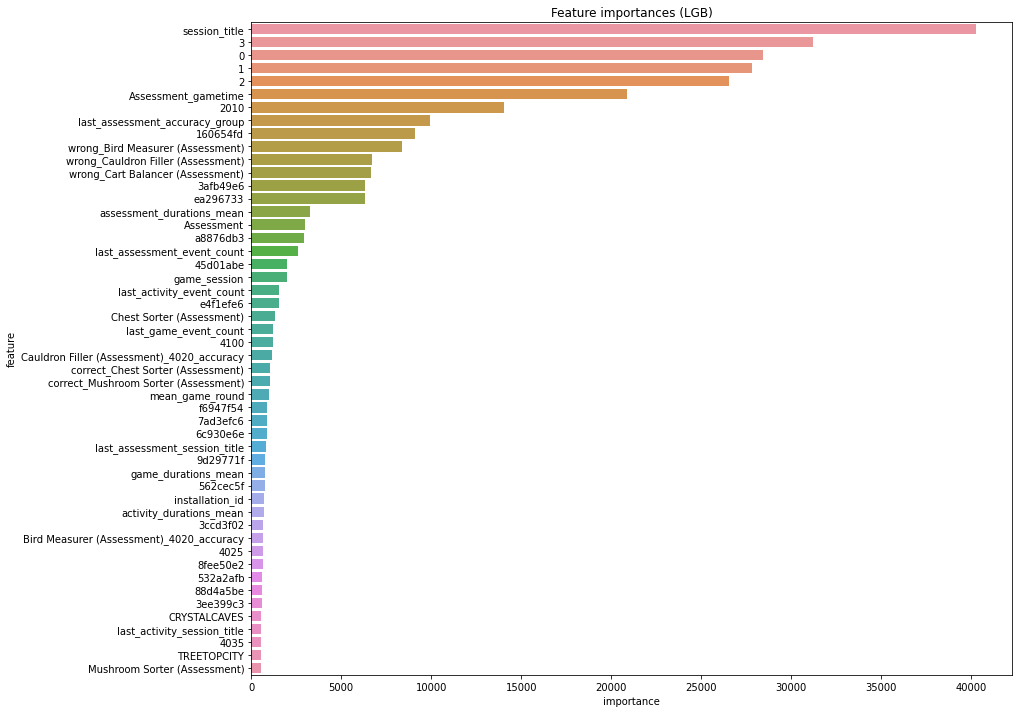

In [0]:
feat_imp = lgbm_removed.feature_importance(importance_type = 'gain')
feature_imp = pd.Series(feat_imp)
feature_imp = pd.DataFrame(x_train_removed.columns, feat_imp, columns = ['feature']).reset_index().rename(columns = {'index': 'importance'})
feature_imp.sort_values(by = 'importance', ascending = False, inplace=True)

fig, ax = plt.subplots(figsize=(30, 12))
plt.subplot(1, 2, 1)
sns.barplot(data=feature_imp[:50], x='importance', y='feature', orient='h')
plt.title('Feature importances (LGB)')

In [0]:
selected_features = []
for i in range(len(feat_imp)):
  if feat_imp[i] > 1:
    selected_features.append(list(x_train.columns)[i])

print(str(len(selected_features)) + " features selected")

450 features selected


In [0]:
selected_df = x_train[[c for c in x_train.columns if c in selected_features]]
selected_df.reset_index(inplace = True, drop = True)

train_selected = lgb.Dataset(selected_df, y_train)

In [0]:
lgbm_selected = LGBModel(train_selected, param)
predict(lgbm_selected, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[3, 1, 3, 2, 1, 2, 3, 1, 3, 3, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 3, 3, 2, 0, 3, 3, 0, 1, 3, 3, 3, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 3, 1, 0, 0, 3, 3, 3, 3, 1, 1, 0, 0, 3, 0, 2, 3, 3, 0, 3, 0, 1, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 2, 1, 3, 3, 1, 0, 3, 0, 3, 1, 3, 3, 3, 3, 0, 1, 0, 0, 1, 3, 2, 3, 1, 2, 3, 1, 3, 1, 3, 0, 3, 0, 1, 3, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 1, 2, 3, 3, 3, 3, 3, 3, 2, 0, 0, 0, 1, 0, 3, 1, 3, 3, 2, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 0, 2, 3, 3, 3, 0, 1, 3, 3, 0, 3, 2, 0, 3, 0, 0, 1, 1, 3, 3, 3, 3, 3, 2, 3, 0, 3, 2, 3, 0, 3, 1, 3, 3, 3, 1, 3, 0, 1, 2, 0, 3, 3, 0, 1, 1, 3, 2, 2, 0, 3, 2, 2, 1, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 3, 1, 1, 1, 0, 1, 1, 3, 3, 3, 2, 0, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 1, 3, 0, 3, 2, 2, 2, 1, 3, 3, 2, 3, 3, 3, 3, 3, 1, 3, 0, 0, 3, 3, 1, 3, 3, 0, 1, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 2, 2, 1, 3, 2, 0, 3, 3, 3, 1, 3, 0, 3, 3, 1, 3, 3, 1, 3, 0, 1, 1, 3, 3, 0, 3, 3, 0, 2, 3, 2, 3, 3, 0, 3, 2, 3, 3, 3, 1, 0, 

### SHAP

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


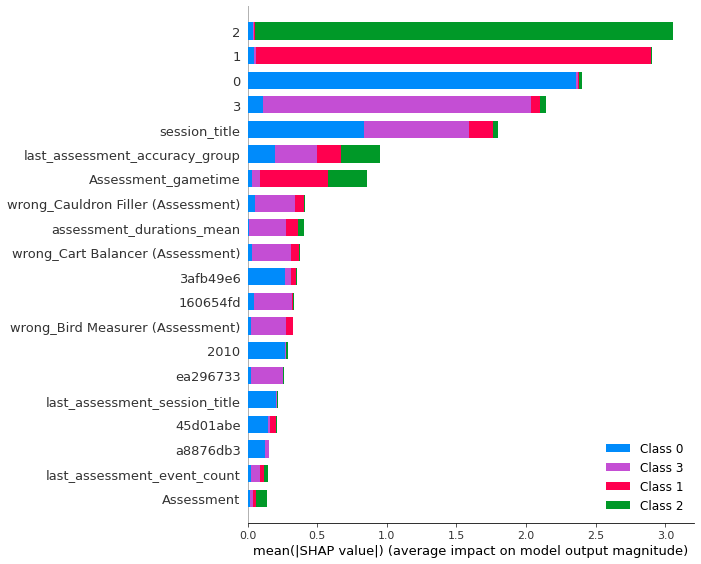

In [0]:
shap_values = shap.TreeExplainer(lgbm_removed).shap_values(x_train_removed)
shap.summary_plot(shap_values, x_train_removed, plot_type="bar")

### Null Importance

In [0]:
def get_feature_importances(x_train, y_train, seed=None):
    # Gather real features
    train_features = x_train_removed.copy()
    # Go over fold and keep track of CV score (train and valid) and feature importances
    
    # Shuffle target if required
    y = y_train.copy()
    
    # Fit LightGBM in RF mode, yes it's quicker than sklearn RandomForest
    dtrain = lgb.Dataset(train_features, y, free_raw_data=False, silent=True)
    param = {'num_leaves': 150, 
            'metric':'multiclass', 
            'objective': 'multiclass', 
            'n_estimators': 200,
            'num_class': 4, 
            'max_depth': 10,
            'boosting_type': 'rf',
            'bagging_freq': 1,
            'bagging_fraction': 0.5,
            'learning_rate': .05}
    
    # Fit the model
    clf = lgb.train(params=param, train_set=dtrain, num_boost_round=200)

    # Get feature importances
    imp_df = pd.DataFrame()
    imp_df["feature"] = list(train_features)
    imp_df["importance_gain"] = clf.feature_importance(importance_type='gain')
    imp_df["importance_split"] = clf.feature_importance(importance_type='split')
    
    y_pred =clf.predict(x_train)
    predictions = []
    for i in y_pred:
        predictions.append(np.argmax(i))
    imp_df['trn_score'] = metrics.accuracy_score(y, predictions)
    
    return imp_df

In [0]:
null_imp_df = pd.DataFrame()
nb_runs = 30
import time
start = time.time()
dsp = ''
for i in range(nb_runs):
    # Get current run importances
    imp_df = get_feature_importances(x_train_removed, y_train)
    imp_df['run'] = i + 1 
    # Concat the latest importances with the old ones
    null_imp_df = pd.concat([null_imp_df, imp_df], axis=0)
    # Erase previous message
    for l in range(len(dsp)):
        print('\b', end='', flush=True)
    # Display current run and time used
    spent = (time.time() - start) / 60
    dsp = 'Done with %4d of %4d (Spent %5.1f min)' % (i + 1, nb_runs, spent)
    print(dsp, end='', flush=True)

Found `n_estimators` in params. Will use it instead of argument


Done with    1 of   30 (Spent   0.6 min)Done with    2 of   30 (Spent   1.3 min)Done with    3 of   30 (Spent   1.9 min)Done with    4 of   30 (Spent   2.5 min)Done with    5 of   30 (Spent   3.2 min)Done with    6 of   30 (Spent   3.8 min)Done with    7 of   30 (Spent   4.5 min)Done with    8 of   30 (Spent   5.1 min)Done with    9 of   30 (Spent   5.7 min)Done with   10 of   30 (Spent   6.4 min)Done with   11 of   30 (Spent   7.1 min)Done with   12 of   30 (Spent   7.8 min)Done with   13 of   30 (Spent   8.5 min)

In [0]:
null_imp_df

,feature,importance_gain,importance_split,trn_score,run
0,Clip,1292.748798,2567,0.888581,1
1,Activity,698.313760,471,0.888581,1
2,Assessment,31929.586471,1253,0.888581,1
3,Game,1118.652729,363,0.888581,1
4,session_title,320499.764899,4569,0.888581,1
...,...,...,...,...,...
468,Assessment_gametime,327046.042481,2585,0.888581,30
469,last_assessment_session_title,1053.021007,196,0.888581,30
470,last_assessment_world,382.312626,88,0.888581,30
471,last_assessment_event_count,17756.116631,1276,0.888581,30


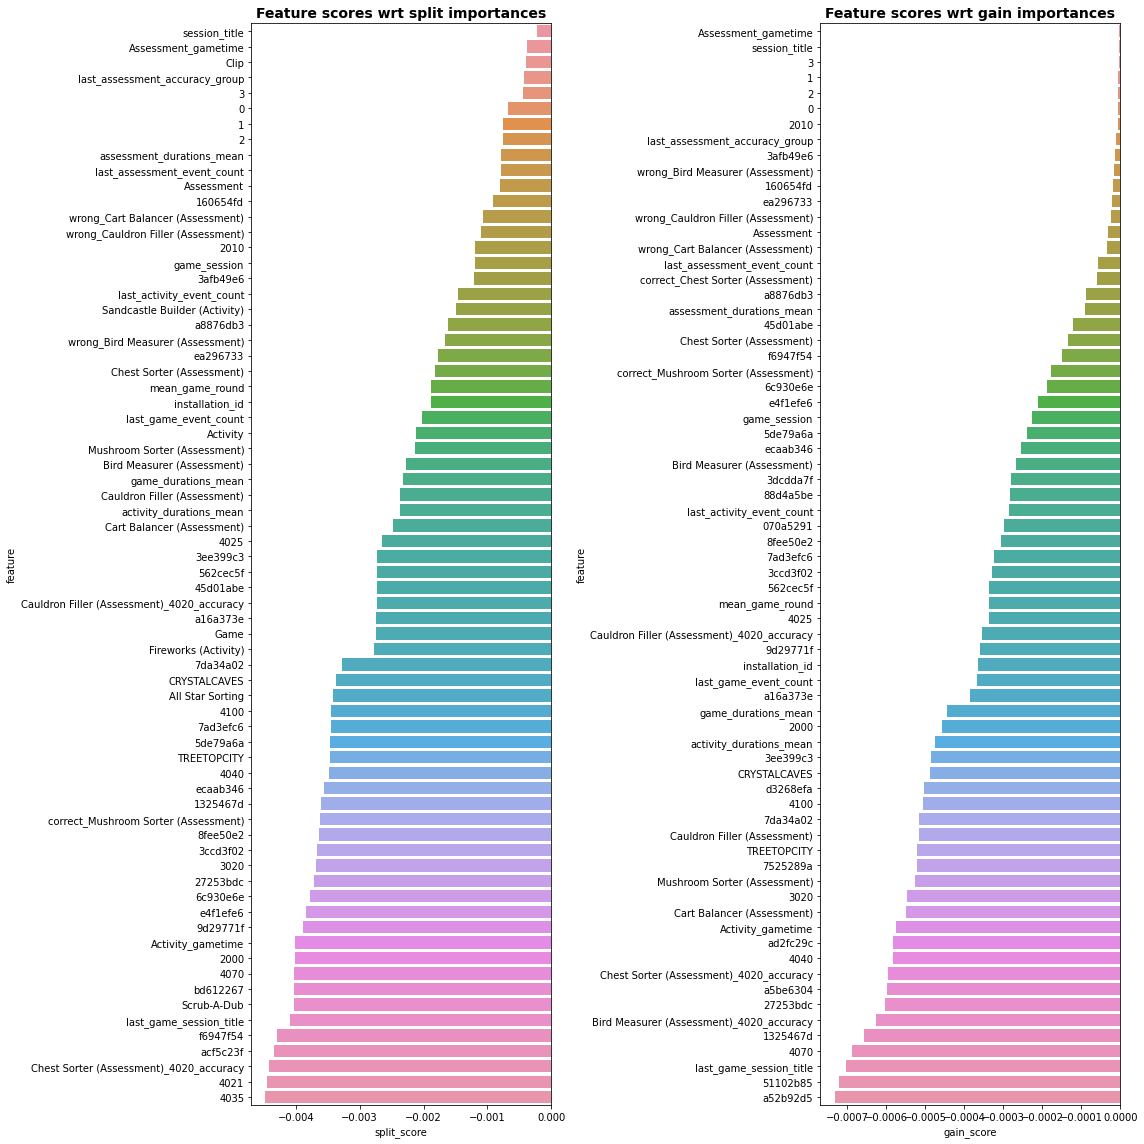

In [0]:
feature_scores = []
for _f in imp_df['feature'].unique():
    f_null_imps_gain = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_gain'].values
    f_act_imps_gain = imp_df.loc[imp_df['feature'] == _f, 'importance_gain'].mean()
    gain_score = np.log(1e-10 + f_act_imps_gain / (1 + np.percentile(f_null_imps_gain, 75)))  # Avoid didvide by zero
    f_null_imps_split = null_imp_df.loc[null_imp_df['feature'] == _f, 'importance_split'].values
    f_act_imps_split = imp_df.loc[imp_df['feature'] == _f, 'importance_split'].mean()
    split_score = np.log(1e-10 + f_act_imps_split / (1 + np.percentile(f_null_imps_split, 75)))  # Avoid didvide by zero
    feature_scores.append((_f, split_score, gain_score))

scores_df = pd.DataFrame(feature_scores, columns=['feature', 'split_score', 'gain_score'])

plt.figure(figsize=(16, 16))
gs = matplotlib.gridspec.GridSpec(1, 2)
# Plot Split importances
ax = plt.subplot(gs[0, 0])
sns.barplot(x='split_score', y='feature', data=scores_df.sort_values('split_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt split importances', fontweight='bold', fontsize=14)
# Plot Gain importances
ax = plt.subplot(gs[0, 1])
sns.barplot(x='gain_score', y='feature', data=scores_df.sort_values('gain_score', ascending=False).iloc[0:70], ax=ax)
ax.set_title('Feature scores wrt gain importances', fontweight='bold', fontsize=14)
plt.tight_layout()

In [0]:
null_imp_features = null_imp_df[:100]['feature'].tolist()
null_imp_features

['Clip',
 'Activity',
 'Assessment',
 'Game',
 'session_title',
 'Magma Peak - Level 1',
 'Sandcastle Builder (Activity)',
 'Slop Problem',
 'Scrub-A-Dub',
 'Tree Top City - Level 1',
 'Ordering Spheres',
 'All Star Sorting',
 'Costume Box',
 'Fireworks (Activity)',
 '12 Monkeys',
 'Tree Top City - Level 2',
 'Flower Waterer (Activity)',
 "Pirate's Tale",
 'Mushroom Sorter (Assessment)',
 'Air Show',
 'Treasure Map',
 'Tree Top City - Level 3',
 'Crystals Rule',
 'Rulers',
 'Bug Measurer (Activity)',
 'Bird Measurer (Assessment)',
 'Watering Hole (Activity)',
 'Magma Peak - Level 2',
 'Dino Drink',
 'Bubble Bath',
 'Bottle Filler (Activity)',
 'Dino Dive',
 'Crystal Caves - Level 1',
 'Chow Time',
 'Cauldron Filler (Assessment)',
 'Balancing Act',
 'Crystal Caves - Level 2',
 'Crystal Caves - Level 3',
 'Chicken Balancer (Activity)',
 'Lifting Heavy Things',
 'Pan Balance',
 'Honey Cake',
 'Happy Camel',
 'Cart Balancer (Assessment)',
 'Heavy, Heavier, Heaviest',
 'Egg Dropper (Activity)',
 'Chest Sorter (Assessment)',
 'Leaf Leader',
 0,
 1,
 2,
 3,
 '27253bdc',
 '77261ab5',
 'b2dba42b',
 '1325467d',
 '5e812b27',
 '9ee1c98c',
 '84538528',
 '37937459',
 '6d90d394',
 '7040c096',
 '5a848010',
 'c1cac9a2',
 '26fd2d99',
 'dcaede90',
 'f71c4741',
 '5c3d2b2f',
 '08fd73f3',
 '73757a5e',
 '2b9272f4',
 'd88e8f25',
 'cf82af56',
 '4a09ace1',
 'b7dc8128',
 '4b5efe37',
 '2c4e6db0',
 '363d3849',
 '587b5989',
 '9e4c8c7b',
 '1cc7cfca',
 '2dc29e21',
 '6043a2b4',
 'c277e121',
 'd45ed6a1',
 'ca11f653',
 'daac11b0',
 '1f19558b',
 'd02b7a8e',
 '4901243f',
 'beb0a7b9',
 '02a42007',
 'e694a35b',
 'b88f38da',
 '884228c8',
 '9b01374f',
 '56cd3b43',
 'a44b10dc',
 'bbfe0445',
 '5d042115']

In [0]:
selected_null_df = x_train[[c for c in x_train.columns if c in null_imp_features]]
selected_null_df.reset_index(inplace = True, drop = True)

train_selected_null = lgb.Dataset(selected_null_df, y_train)

In [0]:
lgbm_removed = LGBModel(train_selected_null, param)
predict(lgbm_removed, x_test, y_test)

Found `n_estimators` in params. Will use it instead of argument


Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.83      0.90       716
           1       0.55      0.62      0.58        39
           2       0.55      0.56      0.55        41
           3       0.65      0.94      0.77       204

    accuracy                           0.84      1000
   macro avg       0.68      0.74      0.70      1000
weighted avg       0.87      0.84      0.84      1000

Confusion Matrix: 
[[597  16  14  89]
 [  8  24   2   5]
 [  5   3  23  10]
 [  8   1   3 192]]


## Hyperparameter Tuning

### RandomizedSearchCV

In [0]:
param_grid = {
    'num_leaves': [25, 35, 45, 55],
    'max_depth': [5, 10, 15, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_leaf': [100, 125, 150],
    'n_estimators': [100, 150, 275, 300]
    }

In [0]:
# Initialize a RandomizedSearchCV object using 5-fold CV-
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=param_grid, cv = 5, n_iter=10, verbose=1, n_jobs = 5)

# Train on training data
rs_cv.fit(selected_df, y_train,verbose=2)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed: 23.5min
[Parallel(n_jobs=5)]: Done  50 out of  50 | elapsed: 29.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sile...
                                            subsample=1.0,
                                            subsample_for_bin=2000

In [0]:
rs_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 20,
 'min_samples_leaf': 125,
 'n_estimators': 200,
 'num_leaves': 35}

In [0]:
best_param = {'boosting_type': 'gbdt',
        'metric':'multi_logloss', 
        'objective': 'multiclass', 
        'num_class': 4,
        'learning_rate': 0.05,
        'max_depth': 20,
        'min_samples_leaf': 125,
        'n_estimators': 200,
        'num_leaves': 35}

In [0]:
lgbm_tuned= LGBModel(train_selected, best_param)
predict(lgbm_tuned, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[0, 3, 2, 2, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 1, 1, 3, 2, 3, 0, 3, 3, 2, 2, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 1, 1, 3, 3, 2, 0, 3, 3, 0, 1, 3, 2, 0, 3, 0, 3, 0, 2, 3, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 2, 3, 3, 0, 0, 3, 3, 3, 2, 3, 0, 0, 1, 0, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 1, 0, 2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0, 2, 1, 3, 0, 1, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 0, 0, 0, 0, 2, 3, 3, 0, 3, 2, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 0, 2, 3, 1, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 2, 0, 1, 3, 1, 3, 3, 2, 3, 2, 1, 0, 2, 3, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 3, 1, 3, 3, 2, 1, 3, 3, 3, 3, 0, 3, 0, 0, 3, 3, 2, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 0, 0, 2, 0, 3, 2, 1, 0, 3, 3, 0, 3, 3, 0, 2, 3, 3, 2, 3, 3, 1, 2, 3, 0, 3, 0, 0, 2, 3, 2, 0, 3, 2, 1, 1, 0, 0, 3, 3, 2, 3, 1, 2, 3, 1, 0, 3, 3, 1, 3, 0, 2, 2, 3, 3, 

In [0]:
reg_param = best_param
reg_param['max_bin'] = 20
reg_param['lambda_l2'] = 0.3

In [0]:
lgbm_reg = LGBModel(train_selected, reg_param)
predict(lgbm_reg, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[0, 3, 3, 2, 3, 3, 1, 3, 3, 0, 3, 3, 3, 3, 3, 0, 0, 1, 1, 3, 3, 3, 0, 3, 3, 2, 2, 1, 3, 0, 3, 3, 2, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 2, 3, 3, 2, 3, 1, 1, 3, 3, 2, 0, 3, 3, 0, 1, 3, 2, 0, 3, 0, 3, 0, 2, 2, 0, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 3, 1, 3, 2, 3, 0, 0, 1, 0, 2, 0, 3, 3, 1, 3, 3, 0, 1, 3, 2, 3, 3, 2, 2, 0, 3, 0, 3, 0, 0, 0, 3, 3, 3, 1, 1, 0, 2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0, 2, 1, 2, 0, 1, 3, 3, 0, 2, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 1, 0, 0, 0, 0, 2, 3, 3, 0, 3, 1, 0, 0, 2, 3, 2, 3, 3, 3, 3, 3, 3, 1, 1, 0, 2, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 2, 3, 1, 3, 3, 3, 3, 0, 3, 1, 3, 3, 3, 2, 0, 1, 3, 1, 3, 3, 2, 3, 2, 1, 0, 0, 3, 3, 1, 2, 1, 3, 2, 0, 0, 3, 0, 3, 3, 1, 3, 3, 2, 1, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 2, 1, 3, 1, 3, 2, 3, 2, 3, 3, 3, 3, 0, 0, 2, 0, 3, 2, 1, 0, 3, 0, 0, 3, 3, 0, 2, 3, 3, 2, 3, 3, 3, 2, 3, 0, 3, 0, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 0, 3, 3, 2, 3, 1, 2, 3, 1, 0, 3, 3, 1, 3, 0, 2, 2, 3, 3, 

### GridSearchCV

In [0]:
param_grid1 = {
    'num_leaves': [25, 35, 50],
    'max_depth': [5, 7, 8],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_leaf': [100, 125, 150],
    'n_estimators': [150, 200, 300]
    }

In [0]:
gsearch = GridSearchCV(estimator=lgb.LGBMClassifier(), param_grid = param_grid1, cv = 5, n_jobs = -1)

gsearch.fit(selected_df, y_train)

gsearch.best_params_

{'learning_rate': 0.05,
 'max_depth': 8,
 'min_samples_leaf': 100,
 'n_estimators': 200,
 'num_leaves': 35}

In [0]:
best_params = {'learning_rate': 0.05,
 'max_depth': 8,
 'min_samples_leaf': 100,
 'n_estimators': 200,
 'num_leaves': 35,
 'boosting_type': 'gbdt',
 'metric': 'multiclass',
 'objective': 'multiclass',
 'num_class': 4}
 
lgbm_gtuned = LGBModel(train_selected, param)
predict(lgbm_gtuned, x_test, y_test)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Classification Report: 
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       716
           1       0.52      0.56      0.54        39
           2       0.51      0.56      0.53        41
           3       0.64      0.90      0.75       204

    accuracy                           0.83      1000
   macro avg       0.66      0.72      0.68      1000
weighted avg       0.86      0.83      0.84      1000

Confusion Matrix: 
[[600  15  14  87]
 [ 12  22   1   4]
 [  5   1  23  12]
 [ 10   4   7 183]]
